In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from scipy.stats import norm
import scipy.stats as sps
import cv2
from scipy.ndimage import convolve
import skimage
from scipy import ndimage
from scipy.spatial.distance import cdist
from nibabel.testing import data_path
import nibabel as nib
from sklearn.mixture import GaussianMixture
import pandas as pd
import skimage.measure
import seaborn as sns
import scipy as sp
import gudhi as gd
import random
from function_geometry import * 
from codegeometry import * 
from PIL import Image
from gtda.diagrams import HeatKernel, Scaler
from gtda.images import Binarizer, RadialFiltration
from gtda.homology import CubicalPersistence
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import similaritymeasures 


# Importing TDA modules
from gtda.plotting import plot_point_cloud
import matplotlib.pyplot as plt
from gtda.diagrams import PersistenceLandscape, Silhouette, PersistenceEntropy, NumberOfPoints, Amplitude
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline, make_union
from gtda.images import HeightFiltration
from gtda.images import RadialFiltration

# Importing Geo modules

from feature_utils import *

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

2023-09-11 11:57:26.120643: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


modules loaded


In [2]:
path_train_b = "./data/train/benign/"
path_train_m = "./data/train/malignant/"
path_test_b = "./data/test/benign/"
path_test_m = "./data/test/malignant/"

In [3]:
from sklearn.utils import shuffle

m_train = 2000
m_test = 1000

U_train_b_rgb = preprocessing_data_rgb(path_train_b, m_train)
U_train_m_rgb = preprocessing_data_rgb(path_train_m, m_train)
U_test_b_rgb = preprocessing_data_rgb(path_test_b, m_test)
U_test_m_rgb = preprocessing_data_rgb(path_test_m, m_test)


U_train_b = preprocessing_data(path_train_b, m_train)
U_train_m = preprocessing_data(path_train_m, m_train)
U_test_b = preprocessing_data(path_test_b, m_test)
U_test_m = preprocessing_data(path_test_m, m_test)


U_train_rgb = np.asarray(U_train_b_rgb + U_train_m_rgb)
y_train = [0]*len(U_train_b) + [1]*len(U_train_m)

U_test_rgb = np.asarray(U_test_b_rgb + U_test_m_rgb)
y_test = [0]*len(U_test_b) + [1]*len(U_test_m)

U_train = np.asarray(U_train_b + U_train_m)
U_test = np.asarray(U_test_b + U_test_m)

In [4]:
len(U_train), len(U_test), len(y_train)

(2637, 660, 2637)

In [5]:
# Concatenate elementwise
combined_list = list(zip(U_train, y_train))

# Fix the seed for reproducibility
random.seed(42)

# Shuffle the combined list
random.shuffle(combined_list)

# Separate the shuffled elements
shuffled_list1, shuffled_list2 = zip(*combined_list)

In [6]:
# Concatenate elementwise
combined_list_rgb = list(zip(U_train_rgb, y_train))

# Fix the seed for reproducibility
random.seed(42)

# Shuffle the combined list
random.shuffle(combined_list_rgb)

# Separate the shuffled elements
shuffled_list1_rgb, shuffled_list2_rgb = zip(*combined_list_rgb)

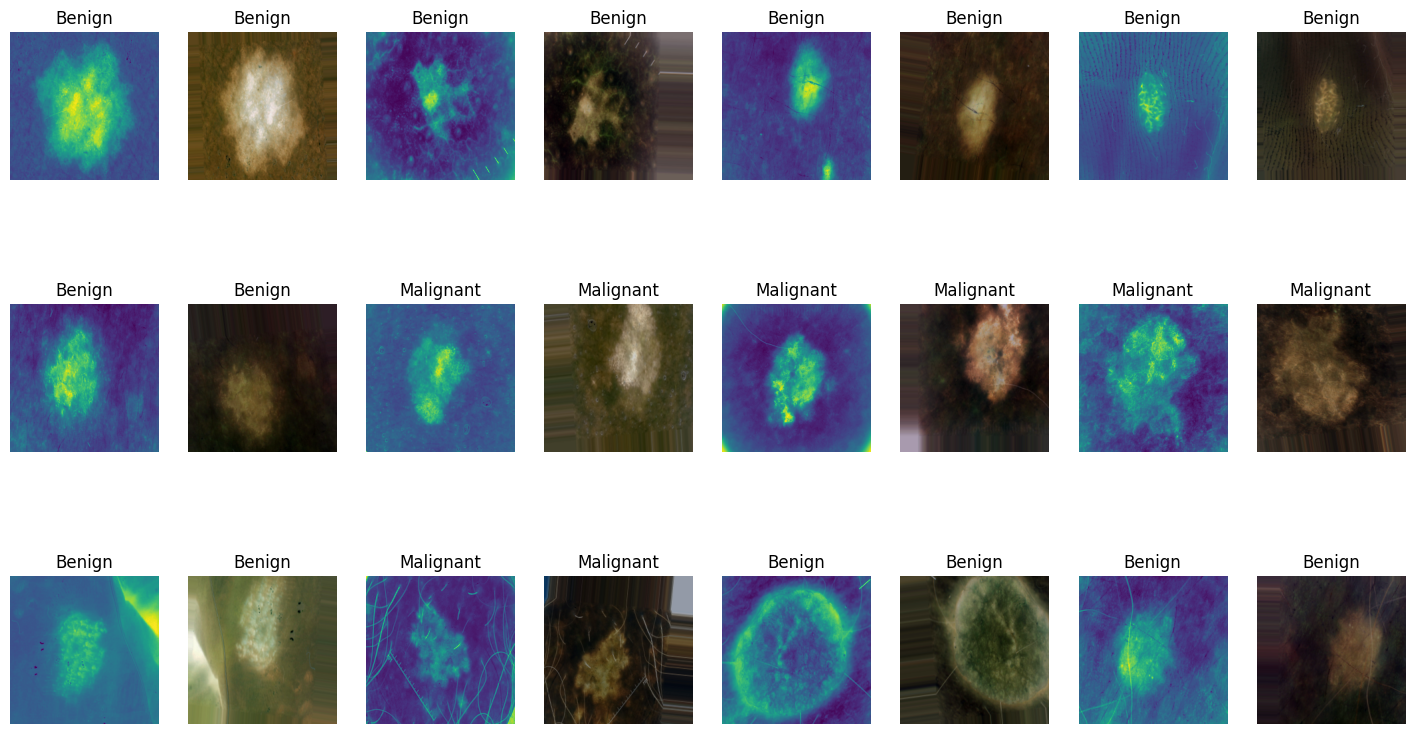

In [7]:
import random
import matplotlib.pyplot as plt

# Concatenate elementwise
combined_list = list(zip(U_train, y_train))

# Fix the seed for reproducibility
random.seed(42)

# Shuffle the combined list
random.shuffle(combined_list)

# Separate the shuffled elements
shuffled_list1, shuffled_list2 = zip(*combined_list)

# Concatenate elementwise (RGB images)
combined_list_rgb = list(zip(U_train_rgb, y_train))

# Fix the seed for reproducibility
random.seed(42)

# Shuffle the combined list (RGB images)
random.shuffle(combined_list_rgb)

# Separate the shuffled elements (RGB images)
shuffled_list1_rgb, shuffled_list2_rgb = zip(*combined_list_rgb)

class_names = ['Benign', 'Malignant']

plt.figure(figsize=(18, 10))

# Plot original images
for i in range(12):
    plt.subplot(3, 8, 2*i + 1)
    plt.imshow(shuffled_list1[i].astype("uint8"))
    plt.title(class_names[shuffled_list2[i]])
    plt.axis("off")

# Plot augmented images (RGB)
for i in range(12):
    plt.subplot(3, 8, 2*i + 2)
    plt.imshow(shuffled_list1_rgb[i].clip(0, 255).astype("uint8"))
    plt.title(class_names[shuffled_list2_rgb[i]])
    plt.axis("off")

plt.show()


In [8]:
shuffled_list1

(array([[52, 53, 56, ..., 77, 75, 74],
        [53, 53, 57, ..., 73, 76, 74],
        [57, 56, 60, ..., 71, 72, 74],
        ...,
        [47, 49, 51, ..., 59, 57, 54],
        [53, 53, 54, ..., 55, 60, 59],
        [59, 59, 60, ..., 54, 60, 63]], dtype=int16),
 array([[ 58,  57,  55, ...,  83,  87,  94],
        [ 56,  56,  54, ...,  81,  84,  89],
        [ 53,  56,  58, ...,  79,  83,  85],
        ...,
        [ 69,  68,  66, ..., 105, 109, 110],
        [ 69,  67,  65, ..., 107, 110, 111],
        [ 71,  68,  69, ..., 108, 110, 112]], dtype=int16),
 array([[33, 32, 30, ..., 29, 28, 27],
        [30, 29, 31, ..., 25, 27, 27],
        [29, 30, 31, ..., 26, 26, 27],
        ...,
        [47, 45, 44, ..., 43, 45, 50],
        [47, 46, 46, ..., 42, 42, 48],
        [47, 45, 44, ..., 43, 45, 48]], dtype=int16),
 array([[55, 58, 58, ..., 61, 62, 63],
        [50, 59, 60, ..., 61, 62, 63],
        [52, 57, 61, ..., 62, 62, 61],
        ...,
        [48, 43, 37, ..., 44, 43, 43],
        [